<a href="https://colab.research.google.com/github/SanyaKapoor/Clustering/blob/main/Elbow_Method_%26_Dunn_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Estimate the correct number of clusters using the elbow method and the Dunn Index**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


In [ ]:
import pandas as pd 
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [ ]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df = data
df.drop(['DEATH_EVENT'], axis = 1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [ ]:
# 1. Download the repo and set it as the current directory
!git clone https://github.com/ElPapi42/deep-deblurring
%cd deep-deblurring

# 2. install the project/module
!python setup.py install

# 3. Add the project directory to the path
import os, sys
sys.path.append(os.getcwd())

#4. Run your code
# ....

In [ ]:
!git clone https://github.com/jqmviegas/jqm_cvi

Cloning into 'jqm_cvi'...
remote: Enumerating objects: 92, done.
remote: Total 92 (delta 0), reused 0 (delta 0), pack-reused 92
Unpacking objects: 100% (92/92), done.


In [ ]:
%cd jqm_cvi/

/content/jqm_cvi


In [ ]:
!python setup.py install

running install
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.6
creating build/lib.linux-x86_64-3.6/jqmcvi
copying jqmcvi/base.py -> build/lib.linux-x86_64-3.6/jqmcvi
copying jqmcvi/__init__.py -> build/lib.linux-x86_64-3.6/jqmcvi
running build_ext
skipping 'jqmcvi/basec.c' Cython extension (up-to-date)
building 'jqmcvi.basec' extension
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/jqmcvi
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I/usr/include/python3.6m -c jqmcvi/basec.c -o build/temp.linux-x86_64-3.6/jqmcvi/basec.o
In file included from /usr/local/lib/python3.6/dist-packages/numpy/core/include/numpy/ndarraytypes.h:1832:0,
                 from /usr/local/lib/python3.6/dist-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from 

In [ ]:
import os, sys
sys.path.append(os.getcwd())

# **Dunn values vs k *without* considering the best dunn value out of 5 random centroid values**

In [ ]:
#Use diff initalisation for centroids?
#random_centroids = cent_init.random(X, n_clusters)
#import centroid_initialization as cent_init

import pandas as pd 
from sklearn import datasets 
from jqmcvi import base 
dunnval = []
k = []
# K-Means 
from sklearn import cluster 

for i in range(299):

  k_means = cluster.KMeans(n_clusters=3, init='k-means++') 
  k_means.fit(df)
  y_pred = k_means.predict(df) 
  k.append(i)
  pred = pd.DataFrame(y_pred) 
  pred.columns = ['Type'] 
  
  prediction = pd.concat([data, pred], axis = 1) 

  clus0 = prediction.loc[prediction.DEATH_EVENT == 0] 
  clus1 = prediction.loc[prediction.DEATH_EVENT == 1] 

  cluster_list = [clus0.values, clus1.values] 

  dunnval.append(base.dunn(cluster_list))

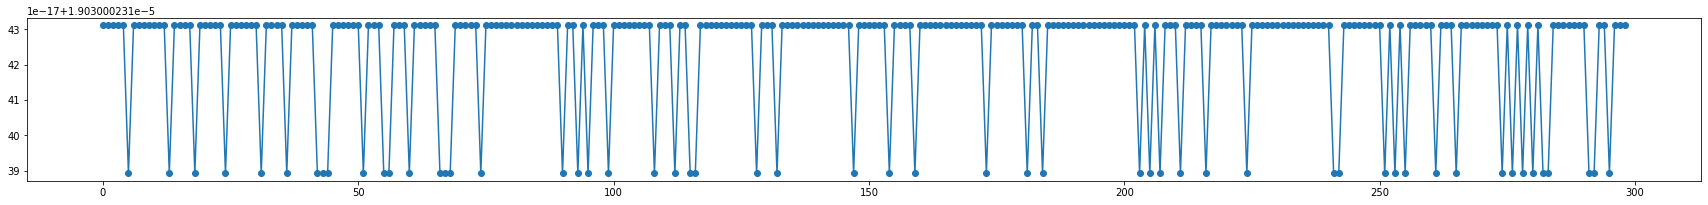

In [ ]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (30,3)
plt.plot(k, dunnval, marker ='+')

# **Inertia vs K**

Text(0, 0.5, 'Inertia')

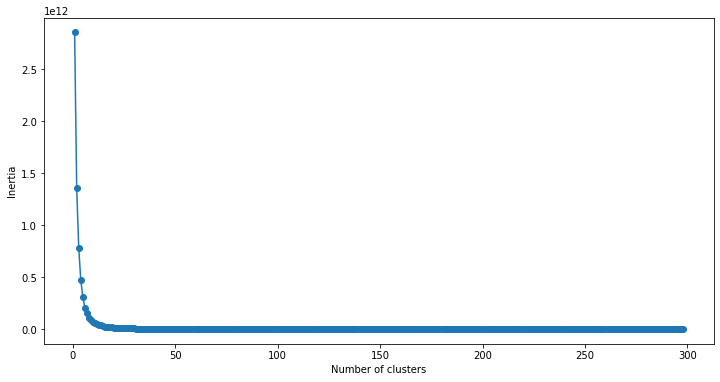

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(df)
kmeans.inertia_
SSE = []
for cluster in range(1,299):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)
frame = pd.DataFrame({'Cluster':range(1,299), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# **Dunn values vs k while considering the best dunn value out of 5 random centroid values**

In [ ]:
#Use diff initalisation for centroids?
#random_centroids = cent_init.random(X, n_clusters)
#import centroid_initialization as cent_init

import pandas as pd 
from sklearn import datasets 
from jqmcvi import base 
dunnval = []
k = []
# K-Means 
from sklearn import cluster 

for i in range(200):
  dunnvalbest = []
  for j in range(3):
    k_means = cluster.KMeans(n_clusters=3, init='k-means++') 
    k_means.fit(df)
    y_pred = k_means.predict(df) 
    k.append(i)
    pred = pd.DataFrame(y_pred) 
    pred.columns = ['Type'] 
    prediction = pd.concat([data, pred], axis = 1) 
    clus0 = prediction.loc[prediction.DEATH_EVENT == 0] 
    clus1 = prediction.loc[prediction.DEATH_EVENT == 1] 
    cluster_list = [clus0.values, clus1.values] 
    dunnvalbest.append(base.dunn(cluster_list))
  dunnval.append(max(dunnvalbest))

In [ ]:
k =[]
for i in range(200):
  k.append(i)

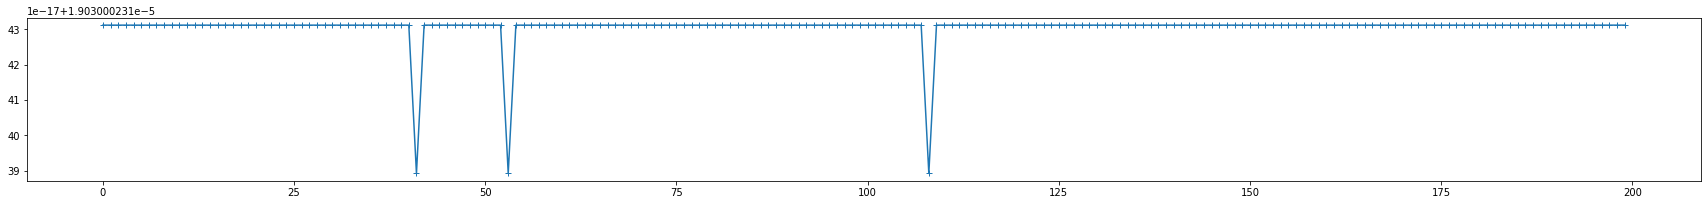

In [ ]:
plt.rcParams["figure.figsize"] = (30,3)
plt.plot(k, dunnval, marker ='+')